<a href="https://colab.research.google.com/github/urbnzazo25/fast.ai-course/blob/main/chapter2/bear_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/urbnzazo25/fast.ai-course.git

fatal: destination path 'fast.ai-course' already exists and is not an empty directory.


In [4]:
!pip install -Uqq fastai
!pip install -Uqq fastcore
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import fastbook
from fastbook import *
# fastbook.setup_book()
from fastai.vision.widgets import *

import warnings
warnings.filterwarnings("ignore")

import requests
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from io import BytesIO
import os

from IPython.core.display import HTML
# %config Completer.use_jedi = False

In [8]:
key = "7ea52d540efa42e2a810bfbd4bb7ef84"
search_term = 'grizzly bear'

In [9]:
results = search_images_bing(key, search_term)
ims = results.attrgot('contentUrl')
ims

(#150) ['https://someinterestingfacts.net/wp-content/uploads/2016/07/Canadian-Grizzly-Bear.jpg','https://tetonvalleylodge.com/wp-content/uploads/2015/04/grizzly-bear-idaho.jpg','http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly+Bear+Wildlife.jpg','https://thelatebloomerhiker.files.wordpress.com/2014/11/grizzly-bear-22224-1920x1200.jpg','https://www.goodfreephotos.com/albums/animals/mammals/grizzly-bear-in-the-wild.jpg','https://s3.amazonaws.com/images.gearjunkie.com/uploads/2020/05/grizzly-bear.jpg','https://s1.ibtimes.com/sites/www.ibtimes.com/files/styles/embed/public/2017/11/20/grizzly-bear.jpg','https://www.tsln.com/wp-content/uploads/2018/10/bears-tsln-101318-3-1240x826.jpg','https://media.salon.com/2014/03/Grizzly-Bear.jpg','https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg'...]

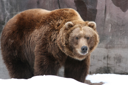

In [10]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)
im = Image.open(dest)
im.to_thumb(128,128)

In [11]:
from pathlib import Path
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir()
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [12]:
fns = get_image_files(path)
fns

(#436) [Path('bears/black/22ffd2b6-48eb-4d6d-a0ba-095739db751a.jpg'),Path('bears/black/e4e0ce5f-1f09-4b70-ace9-c03a944887fd.jpg'),Path('bears/black/7ca53c73-6733-426c-9a3d-bf474d3c1c3c.jpg'),Path('bears/black/8c32023e-56ac-45b4-94a5-256e34ecc114.jpg'),Path('bears/black/5d688024-04cb-4773-8150-e7c288baa748.jpg'),Path('bears/black/c8b87734-079e-429f-ba5b-8cf646681088.jpg'),Path('bears/black/a1eb5a58-cbef-43da-9b3e-9bd034b4935a.jpg'),Path('bears/black/a7cb0b5a-6832-4308-853f-5b8cc393ca5e.jpg'),Path('bears/black/56ad0e47-6994-49cd-9897-92b88990b4c3.jpg'),Path('bears/black/039b708f-814f-4bee-ad12-92ee4d66c753.jpg')...]

In [13]:
failed = verify_images(fns)
failed

(#15) [Path('bears/black/ede80f53-512b-440e-a745-27c781dc6561.jpg'),Path('bears/black/939b6bc3-718f-4e32-aec3-80899b20f2c6.jpg'),Path('bears/teddy/24be8a51-5185-4065-b991-3be345213978.JPG'),Path('bears/teddy/26c91bb3-e70f-4f13-8b7a-ed3b352dfb1d.JPG'),Path('bears/teddy/379ea965-a554-4ad0-a7e5-0d91f6993bf0.JPG'),Path('bears/teddy/8edea5b6-d0ec-4ea1-adbd-4b16c8e597fe.jpg'),Path('bears/teddy/a5f7f109-c4f3-4a7d-a1a6-1ee9fdfbdda1.jpg'),Path('bears/teddy/03639851-9148-4744-90f3-556718961cc7.jpg'),Path('bears/teddy/a4dbb89d-2dd6-4746-81eb-69e13c235a84.JPG'),Path('bears/teddy/9fba85d8-e1de-4aad-9776-6ea93ee2028f.jpg')...]

In [14]:
failed.map(Path.unlink)

(#15) [None,None,None,None,None,None,None,None,None,None...]

In [15]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [16]:
dls = bears.dataloaders(path)

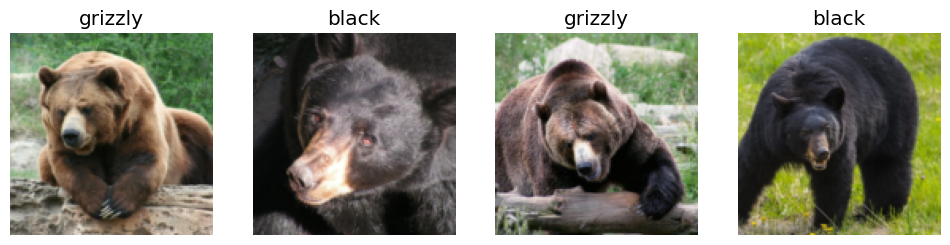

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

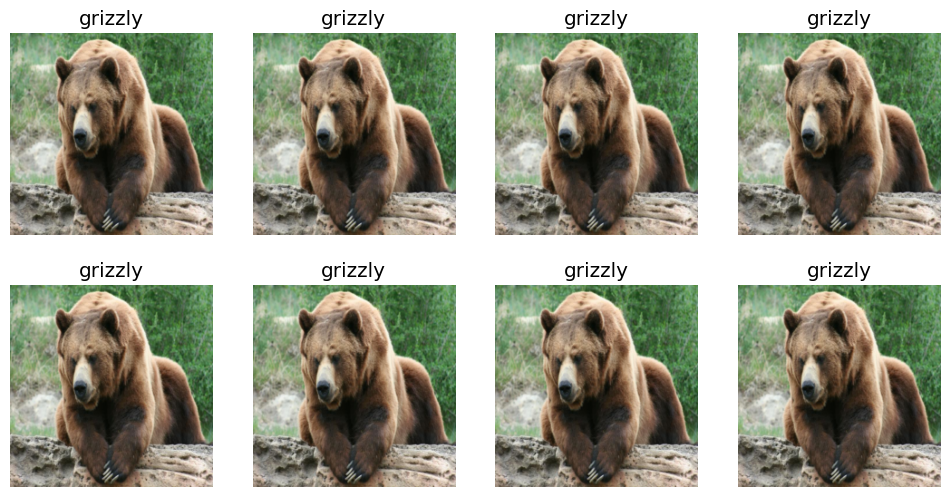

In [23]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2, unique=True)

In [24]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 201MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.266200,0.332262,0.083333,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.225653,0.303932,0.035714,00:28
1,0.183377,0.316074,0.035714,00:32
2,0.146381,0.335640,0.035714,00:27
3,0.125437,0.326115,0.035714,00:28


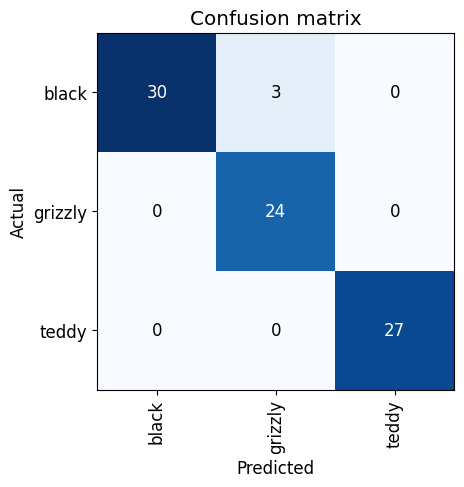

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

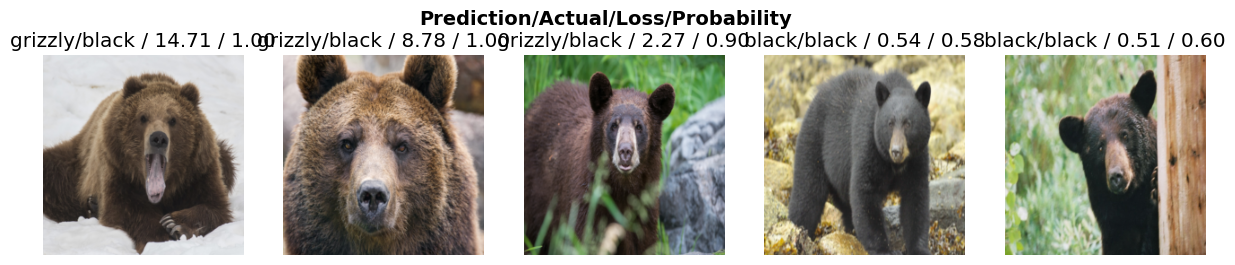

In [26]:
interp.plot_top_losses(5, nrows=1)

In [28]:
cleaner = ImageClassifierCleaner(learn)
cleaner